In [ ]:
!pip install opencv-python==4.6.0.66
!pip install matplotlib==3.6.2
!pip install imageio==2.23.0
!pip install gdown==4.6.0
!pip install tensorflow==2.10.1

In [ ]:
!pip uninstall tensorflow
!pip install tensorflow==2.10


Streaming output truncated to the last 5000 lines.
    /usr/local/lib/python3.10/dist-packages/tensorflow/include/third_party/gpus/cuda/extras/CUPTI/include/thrust/unique.h
    /usr/local/lib/python3.10/dist-packages/tensorflow/include/third_party/gpus/cuda/extras/CUPTI/include/thrust/universal_allocator.h
    /usr/local/lib/python3.10/dist-packages/tensorflow/include/third_party/gpus/cuda/extras/CUPTI/include/thrust/universal_ptr.h
    /usr/local/lib/python3.10/dist-packages/tensorflow/include/third_party/gpus/cuda/extras/CUPTI/include/thrust/universal_vector.h
    /usr/local/lib/python3.10/dist-packages/tensorflow/include/third_party/gpus/cuda/extras/CUPTI/include/thrust/version.h
    /usr/local/lib/python3.10/dist-packages/tensorflow/include/third_party/gpus/cuda/extras/CUPTI/include/thrust/zip_function.h
    /usr/local/lib/python3.10/dist-packages/tensorflow/include/third_party/gpus/cuda/extras/CUPTI/include/vector_functions.h
    /usr/local/lib/python3.10/dist-packages/tensorflow/

In [ ]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

ImportError: /usr/local/lib/python3.10/dist-packages/tensorflow/python/_pywrap_tfe.so: undefined symbol: _ZN10tensorflow19CancellationManager11StartCancelEv

In [ ]:
tf.config.list_physical_devices('GPU')

In [ ]:
# prompt: check if gpu is being used

import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio


physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
for device in physical_devices:
  device

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

In [ ]:

import gdown

In [ ]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From: https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
To: /content/data.zip
100%|██████████| 423M/423M [00:05<00:00, 76.4MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [ ]:
def load_video(path:str) -> List[float]:

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()

    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [ ]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]


In [ ]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [ ]:

char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [ ]:
def load_alignments(path:str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [ ]:
def load_data(path: str):
    path = bytes.decode(path.numpy())
    #file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    file_name = path.split('/')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)

    return frames, alignments

In [ ]:

test_path = './data/s1/bbaf2n.mpg'

In [ ]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

'bbaf2n'

In [ ]:

frames, alignments = load_data(tf.convert_to_tensor(test_path))

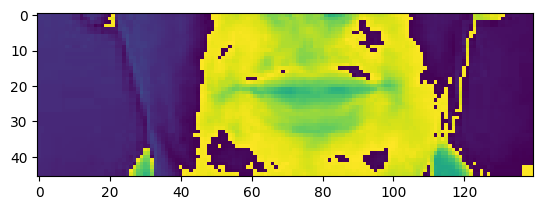

In [ ]:
plt.imshow(frames[40])

In [ ]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39,  6, 39, 20, 23, 15,
       39, 14, 15, 23])>

In [ ]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at f two now'>

In [ ]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg',shuffle=False)
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split
train = data.take(450)
test = data.skip(450)

In [ ]:
frames, alignments = data.as_numpy_iterator().next()

In [ ]:
sample = data.as_numpy_iterator()

In [ ]:
val = sample.next(); val[0]

array([[[[[ 1.444561  ],
          [ 1.444561  ],
          [ 1.444561  ],
          ...,
          [ 9.57972   ],
          [ 0.26610333],
          [ 0.3041181 ]],

         [[ 1.444561  ],
          [ 1.444561  ],
          [ 1.444561  ],
          ...,
          [ 9.57972   ],
          [ 0.26610333],
          [ 0.26610333]],

         [[ 1.3305167 ],
          [ 1.3305167 ],
          [ 1.4065462 ],
          ...,
          [ 0.22808857],
          [ 0.34213287],
          [ 0.34213287]],

         ...,

         [[ 0.95036906],
          [ 0.95036906],
          [ 0.95036906],
          ...,
          [ 0.        ],
          [ 0.        ],
          [ 0.        ]],

         [[ 0.95036906],
          [ 0.95036906],
          [ 0.95036906],
          ...,
          [ 9.693765  ],
          [ 9.693765  ],
          [ 9.693765  ]],

         [[ 0.95036906],
          [ 0.95036906],
          [ 0.95036906],
          ...,
          [ 9.693765  ],
          [ 9.693765  ],
          

In [ ]:
imageio.mimsave('./animation.gif', val[0][0], fps=10)

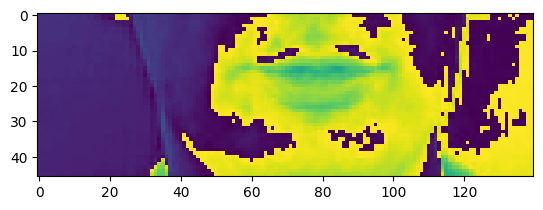

In [ ]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video
plt.imshow(val[0][0][35])

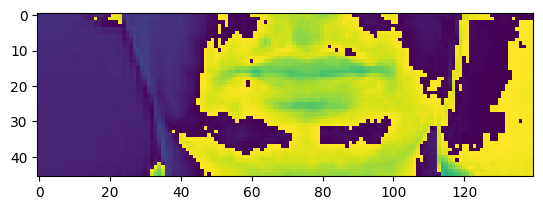

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure()
ims = []

for i in range(len(val[0][0])):
    im = plt.imshow(val[0][0][i], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=100)

HTML(ani.to_jshtml())

In [ ]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'lay red at e four please'>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [ ]:

data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [ ]:

model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128)  3584      
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128)  0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 75, 23, 70, 128)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 75, 11, 35, 256)  0         
 3D)                                                    

In [ ]:
yhat = model.predict(val[0])

1/1 [==============================] - 10s 10s/step


In [ ]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])


<tf.Tensor: shape=(), dtype=string, numpy=b'uuuuuuuuuuuuuuueeeeeeeeeeeeeeeeeeuuuuuuuueeeeeeeeeeeeeuuuuuueeeeeeeeeeeeeee'>

In [ ]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])


<tf.Tensor: shape=(), dtype=string, numpy=b'uuuuuuuuuuuuuuueeeeeeeeeeeeeeeeeeuuuuuuuueeeeeeeeeeeeeuuuuuueeeeeeeeeeeeeee'>

In [ ]:
model.input_shape

(None, 75, 46, 140, 1)

In [ ]:
model.output_shape

(None, 75, 41)

In [ ]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [ ]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [ ]:
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset) -> None:
        self.dataset = dataset.as_numpy_iterator()

    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

In [ ]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True)

In [ ]:
schedule_callback = LearningRateScheduler(scheduler)

In [ ]:
example_callback = ProduceExample(test)

In [ ]:
model.fit(train, validation_data=test, epochs=10, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/10


KeyboardInterrupt: 

Below are checkpoints to be used if you want to save time.Else skip the below code.

In [ ]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From: https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y
To: /content/checkpoints.zip
100%|██████████| 94.5M/94.5M [00:01<00:00, 52.0MB/s]


['models/checkpoint.index',
 'models/__MACOSX/._checkpoint.index',
 'models/checkpoint.data-00000-of-00001',
 'models/__MACOSX/._checkpoint.data-00000-of-00001',
 'models/checkpoint',
 'models/__MACOSX/._checkpoint']

In [ ]:
model.load_weights('models/checkpoint')


In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
sample = test_data.next()

In [ ]:
yhat = model.predict(sample[0])

1/1 [==============================] - 9s 9s/step


In [ ]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin white with u one soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay green with t zero now'>]

In [ ]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()


In [ ]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin white with u one soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay green with t zero now'>]

TEST on vid


In [ ]:
sample = load_data(tf.convert_to_tensor('/content/data/s1/bbaf2n.mpg'))


In [ ]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at f two now'>]

In [ ]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 [==============================] - 4s 4s/step


In [ ]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [ ]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at f two now'>]

Comparison Stuff

In [ ]:
!pip install SpeechRecognition
!pip install pydub
!pip install moviepy
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 45.6 MB/s eta 0:00:00


In [ ]:
sample_frames = load_video('/content/data/s1/bbaf2n.mpg')
yhat = model.predict(tf.expand_dims(sample_frames, axis=0))
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()
predicted_text = tf.strings.reduce_join([num_to_char(word) for word in decoded[0]]).numpy().decode('utf-8')
print('Predicted Text:', predicted_text)


In [ ]:
from pydub import AudioSegment
from moviepy.editor import VideoFileClip
import speech_recognition as sr
import os
import tensorflow as tf

def extract_audio_from_video(video_path, audio_output_path):
    # Suppress MoviePy logs
    os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/bin/ffmpeg"
    video = VideoFileClip(video_path, verbose=False)
    video.audio.write_audiofile(audio_output_path, logger=None)

def transcribe_audio_to_text(audio_path):

    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_path) as audio_file:
        audio_data = recognizer.record(audio_file)
        try:
            # Use Google's speech recognition
            text = recognizer.recognize_google(audio_data)
            return postprocess_transcription(text)
        except sr.UnknownValueError:
            print("Speech Recognition could not understand the audio.")
            return None
        except sr.RequestError as e:
            print(f"Could not request results from the Speech Recognition service; {e}")
            return None

def postprocess_transcription(transcription):

    digit_to_word = {
        "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
        "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
    }
    words = transcription.split()
    processed_words = [digit_to_word[word] if word in digit_to_word else word for word in words]
    return " ".join(processed_words)

# Suppress TensorFlow logging
tf.get_logger().setLevel('ERROR')

# Example Usage
video_path = "/content/data/s1/bbaf2n.mpg"  # Path to your video file
audio_path = "extracted_audio.wav"  # Path where the extracted audio will be saved

# Extract audio from video
extract_audio_from_video(video_path, audio_path)

# Transcribe the extracted audio
speech_text = transcribe_audio_to_text(audio_path)

# Compare the speech text with the predicted text
yhat = model.predict(tf.expand_dims(sample[0], axis=0), verbose=0)  # Suppress prediction output
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()
predicted_text = tf.strings.reduce_join([num_to_char(word) for word in decoded[0]]).numpy().decode('utf-8')

# Output results
print('Speech Text:', speech_text)
print('Predicted Text:', predicted_text)


Speech Text: dim blue F2 now
Predicted Text: bin blue at f two now


In [ ]:
from difflib import SequenceMatcher

def normalize_text(text):

    word_to_digit = {
        "zero": "0", "one": "1", "two": "2", "three": "3", "four": "4",
        "five": "5", "six": "6", "seven": "7", "eight": "8", "nine": "9","hundred": "100","thousand": "1000","million": "1000000"
    }
    digit_to_word = {v: k for k, v in word_to_digit.items()}

    video_path = "/content/fake_vid.mpg"
    #video_path = "/content/data/s1/bbaf2n.mpg"



    words = text.lower().split()

    normalized_words = []
    for word in words:
        if word in word_to_digit:
            print(f"Detected '{word}' as its numerical equivalent '{word_to_digit[word]}'.")
            normalized_words.append(word_to_digit[word])
        elif word in digit_to_word:
            print(f"Detected '{word}' as its word equivalent '{digit_to_word[word]}'.")
            normalized_words.append(digit_to_word[word])
        else:
            normalized_words.append(word)
    return " ".join(normalized_words)


def similar(a, b):

    return SequenceMatcher(None, a, b).ratio()


# Normalize both texts
normalized_speech_text = normalize_text(speech_text)
normalized_predicted_text = normalize_text(predicted_text)


# Calculate similarity
similarity = similar(normalized_speech_text, normalized_predicted_text) * 100

# Determine result based on similarity

if similarity > 60:
      print("The video is real.")
else:
      print("This is a deepfake.")

print(f"Similarity: {similarity:.2f}%")

Detected 'two' as its numerical equivalent '2'.
The video is real.
Similarity: 76.47%


In [ ]:
import numpy as np
from jiwer import wer, cer

def calculate_metrics(y_true, y_pred):
    # Convert y_true to a list of strings
    y_true = [tf.strings.reduce_join([num_to_char(word) for word in y_true]).numpy().decode('utf-8')]
    # Convert y_pred to a list of strings
    y_pred = [tf.strings.reduce_join([num_to_char(word) for word in sentence]).numpy().decode('utf-8') for sentence in y_pred]

    cer_score = np.mean([cer(t, p) for t, p in zip(y_true, y_pred)])
    wer_score = np.mean([wer(t, p) for t, p in zip(y_true, y_pred)])

    return cer_score, wer_score

# Example usage
y_true = sample[0]  # Ground truth alignments
y_pred = decoded    # Predicted alignments

cer_score, wer_score = calculate_metrics(y_true, y_pred)
print(f"Character Error Rate: {cer_score:.4f}, Word Error Rate: {wer_score:.4f}")

Character Error Rate: 1.0000, Word Error Rate: 6.0000


In [ ]:
model.save(r'/content/saved_model/nb_model.h5')